In [70]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Input
from keras.utils import load_img, img_to_array

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd

In [62]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16, preprocess_input


In [72]:
input_tensor = Input(shape=(224, 224, 3)) # Detalle: redefinimos el input tensor para evitar warnings al predecir

model = VGG16(input_tensor=input_tensor)
model = Model(inputs = input_tensor, outputs = model.layers[-2].output) # Salida de la anteúltima capa, antes de la clasificación

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 219s 0us/step


## Lista con paths

In [ ]:
path_images = ["airplane","car","cat","dog","flower","fruit","motorbike","person"]
path_root="natural_images"
path_dict={}
for path_img in path_images:
    final_path=os.path.join( path_root , path_img)
    print(final_path)
    path_dict[path_img] = sorted([os.path.join(final_path , file) for file in os.listdir(final_path) if file.endswith(".jpg") ])
    print(path_dict[path_img])


natural_images\airplane
['natural_images\\airplane\\airplane_0000.jpg', 'natural_images\\airplane\\airplane_0001.jpg', 'natural_images\\airplane\\airplane_0002.jpg', 'natural_images\\airplane\\airplane_0003.jpg', 'natural_images\\airplane\\airplane_0004.jpg', 'natural_images\\airplane\\airplane_0005.jpg', 'natural_images\\airplane\\airplane_0006.jpg', 'natural_images\\airplane\\airplane_0007.jpg', 'natural_images\\airplane\\airplane_0008.jpg', 'natural_images\\airplane\\airplane_0009.jpg', 'natural_images\\airplane\\airplane_0010.jpg', 'natural_images\\airplane\\airplane_0011.jpg', 'natural_images\\airplane\\airplane_0012.jpg', 'natural_images\\airplane\\airplane_0013.jpg', 'natural_images\\airplane\\airplane_0014.jpg', 'natural_images\\airplane\\airplane_0015.jpg', 'natural_images\\airplane\\airplane_0016.jpg', 'natural_images\\airplane\\airplane_0017.jpg', 'natural_images\\airplane\\airplane_0018.jpg', 'natural_images\\airplane\\airplane_0019.jpg', 'natural_images\\airplane\\airplane

In [64]:
def tratamiento_imagen(row):
    img=cv2.imread(row["path_images"], cv2.IMREAD_COLOR)
    Red = img[:,:,2].copy()
    Blue= img[:,:,0].copy()
    img_final = img.copy()
    img_final[:,:,0] = Red
    img_final[:,:,2] = Blue
    img_final = cv2.resize(img_final, (224, 224))
    img_final = img_final.astype(np.float32)
    img_final = preprocess_input(img_final)
    return img , img_final

df=pd.DataFrame(columns=["path_images","tipo","tensor_original_BGR","tensor_final_RGB"])
count=0
for element in path_dict.keys():
    df=pd.concat([df , pd.DataFrame(path_dict[element] , columns=["path_images"])])
    f = df["tipo"].isna()
    df.loc[f,"tipo"] = element
df=df.reset_index()
df.drop(columns="index",inplace=True)

df[["tensor_original_BGR" , "tensor_final_RGB"]]= df.apply(tratamiento_imagen , axis=1 ,result_type="expand")
df


,path_images,tipo,tensor_original_BGR,tensor_final_RGB
0,natural_images\airplane\airplane_0000.jpg,airplane,"[[[232, 240, 223], [232, 240, 223], [233, 241,...","[[[128.061, 123.221, 99.32], [128.061, 123.221..."
1,natural_images\airplane\airplane_0001.jpg,airplane,"[[[226, 251, 255], [225, 250, 254], [228, 248,...","[[[122.061, 134.22101, 131.32], [122.061, 132...."
2,natural_images\airplane\airplane_0002.jpg,airplane,"[[[165, 155, 125], [165, 154, 122], [174, 156,...","[[[61.060997, 38.221, 0.3199997], [65.061, 38...."
3,natural_images\airplane\airplane_0003.jpg,airplane,"[[[208, 208, 184], [196, 196, 172], [202, 205,...","[[[102.061, 89.221, 58.32], [95.061, 84.221, 5..."
4,natural_images\airplane\airplane_0004.jpg,airplane,"[[[213, 214, 180], [219, 220, 181], [220, 215,...","[[[110.061, 98.221, 56.32], [115.061, 100.221,..."
...,...,...,...,...
6894,natural_images\person\person_0981.jpg,person,"[[[14, 11, 13], [14, 11, 13], [13, 10, 12], [1...","[[[-89.939, -105.779, -110.68], [-89.939, -105..."
6895,natural_images\person\person_0982.jpg,person,"[[[90, 198, 192], [90, 198, 192], [90, 198, 19...","[[[-13.939003, 81.221, 68.32], [-13.939003, 81..."
6896,natural_images\person\person_0983.jpg,person,"[[[27, 40, 42], [27, 40, 42], [27, 40, 42], [2...","[[[-76.939, -76.779, -81.68], [-76.939, -76.77..."
6897,natural_images\person\person_0984.jpg,person,"[[[2, 26, 2], [1, 28, 2], [2, 31, 5], [4, 35, ...","[[[-101.939, -90.779, -121.68], [-102.939, -87..."


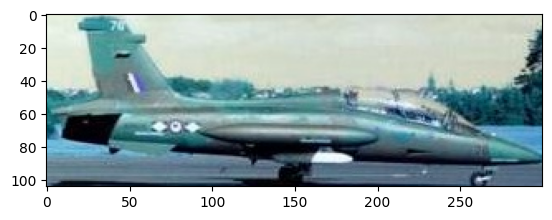

In [65]:
plt.imshow(df.loc[0,"tensor_original_BGR"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.68..142.061].


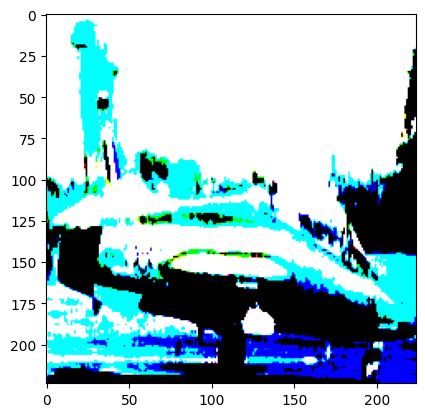

In [66]:
plt.imshow(df.loc[0,"tensor_final_RGB"])

In [73]:
def preprocess_and_extract(file_list, model):
    images = []
    for file in file_list:
        img = load_img(file, target_size=(224, 224))
        img = img_to_array(img)
        images.append(img)

    # Convertir a array y preprocesar todo junto
    images = np.array(images)
    images = preprocess_input(images)

    # Predecir todas las imágenes en batch
    features = model.predict(images, batch_size=32, verbose=1)
    return np.array(file_list), features

def view_cluster(gps, cluster):
    plt.figure(figsize=(25, 25))
    files = gps
    # Máximo 10 para visualizar
    if len(files) > 10:
        files = files[:10]
    for index, file in enumerate(files):
        plt.subplot(1, 10, index + 1)
        img = load_img(file)
        img = img_to_array(img).astype('uint8')
        plt.imshow(img)
        plt.title(f'Cluster n: {cluster}')
        plt.axis('off')
    plt.show()

In [98]:
path=[]
for key in path_dict.keys():
    print(key)
    path += path_dict[key]
len(path)

airplane
car
cat
dog
flower
fruit
motorbike
person


6899

In [91]:
names, features = preprocess_and_extract(path, model)

216/216 ━━━━━━━━━━━━━━━━━━━━ 545s 3s/step


In [93]:
features.shape

(6899, 4096)

In [94]:
df = pd.DataFrame(data=features)

In [108]:
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.725486,0.000000,3.347053,0.000000,2.567833,0.610171,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.973807,3.850669,0.00000,0.000000
1,0.000000,0.000000,2.890268,0.000000,1.454425,2.634050,0.0,3.562424,0.000000,3.116060,...,0.0,0.654914,0.000000,0.622745,0.000000,0.0,2.239553,3.966587,0.00000,0.499471
2,0.000000,0.000000,2.146848,0.005841,0.000000,0.107351,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.731043,0.000000,0.0,0.000000,1.482779,0.00000,0.000000
3,0.000000,0.000000,2.301114,0.000000,2.103612,0.000000,0.0,0.000000,0.000000,0.349480,...,0.0,2.516613,0.000000,0.000000,0.000000,0.0,4.720914,4.792036,0.00000,0.000000
4,0.000000,0.000000,1.126047,0.796374,0.000000,0.000000,0.0,0.000000,0.000000,1.201844,...,0.0,0.273120,0.000000,2.927129,0.000000,0.0,3.065292,1.295985,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,0.000000,0.525716,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.446355,0.000000,...,0.0,0.000000,0.181734,1.389057,2.695840,0.0,0.000000,0.000000,0.25208,0.000000
6895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.632992,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
6896,0.153287,0.000000,0.000000,0.114017,0.000000,0.082895,0.0,0.000000,2.621198,0.000000,...,0.0,0.000000,1.035922,0.474133,2.466053,0.0,0.000000,0.000000,0.00000,1.550649
6897,0.000000,0.000000,0.000000,0.490548,0.000000,0.000000,0.0,0.369462,2.006730,0.000000,...,0.0,0.000000,0.000000,0.151163,0.568129,0.0,0.000000,0.000000,0.00000,0.106989


In [113]:
longitud = 0
for element in path_dict.keys():
    df.loc[longitud:longitud +len(path_dict[element]) , "label"] = element
    print(element)
    print(f"valor inicial : {longitud}")
    print(f"valor final:{longitud + len(path_dict[element])}")

    longitud+=len(path_dict[element])


    

airplane
valor inicial : 0
valor final:727
car
valor inicial : 727
valor final:1695
cat
valor inicial : 1695
valor final:2580
dog
valor inicial : 2580
valor final:3282
flower
valor inicial : 3282
valor final:4125
fruit
valor inicial : 4125
valor final:5125
motorbike
valor inicial : 5125
valor final:5913
person
valor inicial : 5913
valor final:6899


In [115]:
df.to_csv("features_vgg16.csv")

In [119]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0.725486,0.000000,3.347053,0.000000,2.567833,0.610171,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2.973807,3.850669,0.00000,0.000000,airplane
1,0.000000,0.000000,2.890268,0.000000,1.454425,2.634050,0.0,3.562424,0.000000,3.116060,...,0.654914,0.000000,0.622745,0.000000,0.0,2.239553,3.966587,0.00000,0.499471,airplane
2,0.000000,0.000000,2.146848,0.005841,0.000000,0.107351,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.731043,0.000000,0.0,0.000000,1.482779,0.00000,0.000000,airplane
3,0.000000,0.000000,2.301114,0.000000,2.103612,0.000000,0.0,0.000000,0.000000,0.349480,...,2.516613,0.000000,0.000000,0.000000,0.0,4.720914,4.792036,0.00000,0.000000,airplane
4,0.000000,0.000000,1.126047,0.796374,0.000000,0.000000,0.0,0.000000,0.000000,1.201844,...,0.273120,0.000000,2.927129,0.000000,0.0,3.065292,1.295985,0.00000,0.000000,airplane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,0.000000,0.525716,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.446355,0.000000,...,0.000000,0.181734,1.389057,2.695840,0.0,0.000000,0.000000,0.25208,0.000000,person
6895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.632992,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,person
6896,0.153287,0.000000,0.000000,0.114017,0.000000,0.082895,0.0,0.000000,2.621198,0.000000,...,0.000000,1.035922,0.474133,2.466053,0.0,0.000000,0.000000,0.00000,1.550649,person
6897,0.000000,0.000000,0.000000,0.490548,0.000000,0.000000,0.0,0.369462,2.006730,0.000000,...,0.000000,0.000000,0.151163,0.568129,0.0,0.000000,0.000000,0.00000,0.106989,person
